## Univariate Analysis

#### Histogram of Payload Mass
Purpose: To understand the distribution of payload masses across different launches.
Insight: Identify any common payload mass ranges and any potential outliers.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('./dataset_part_1.csv')
# df.head(10)




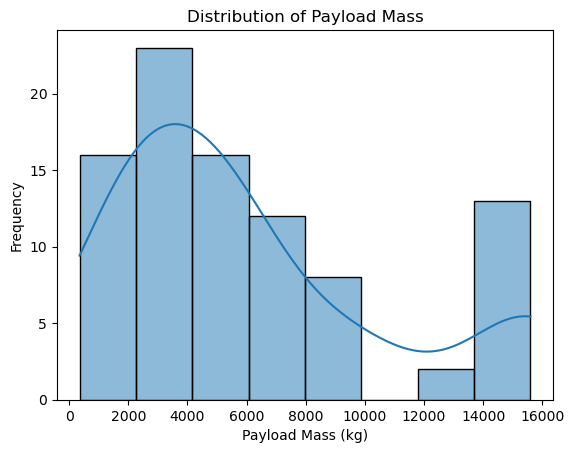

In [5]:
sns.histplot(df['PayloadMass'], kde=True)
plt.title('Distribution of Payload Mass')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')
plt.show()


#### Box Plot of Booster Version Performance
Purpose: To visualize the spread and identify outliers in booster version performance.
Insight: Show variability and any significant outliers in booster performance.
Code Snippet:

In [10]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [12]:
df['Success'] = df['Outcome'].apply(lambda x: 1 if 'None' not in x else 0)

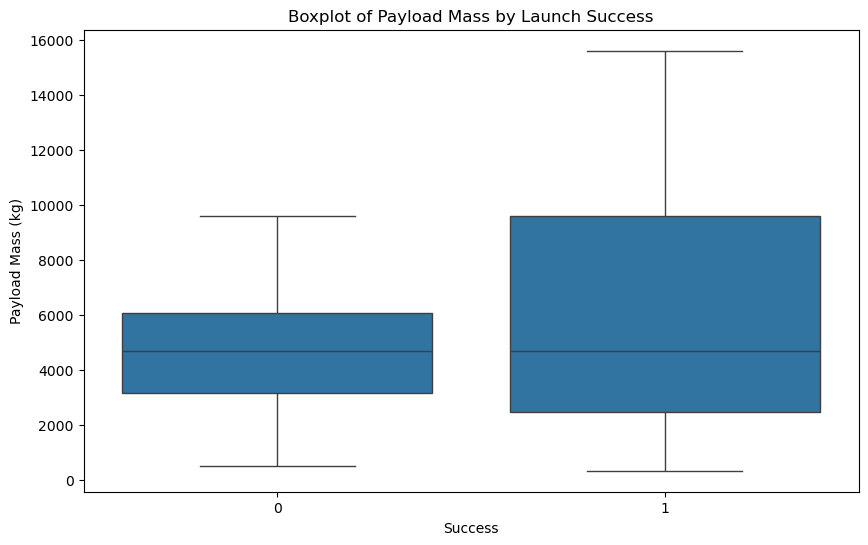

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Success', y='PayloadMass', data=df)
plt.xlabel('Success')
plt.ylabel('Payload Mass (kg)')
plt.title('Boxplot of Payload Mass by Launch Success')
plt.show()

#### Bivariate Analysis:

Scatter Plot of Payload Mass vs. Success Rate:

Purpose: To explore the relationship between payload mass and the success rate of launches.
Insight: Determine if heavier payloads impact the success rate.

Code Snippet:

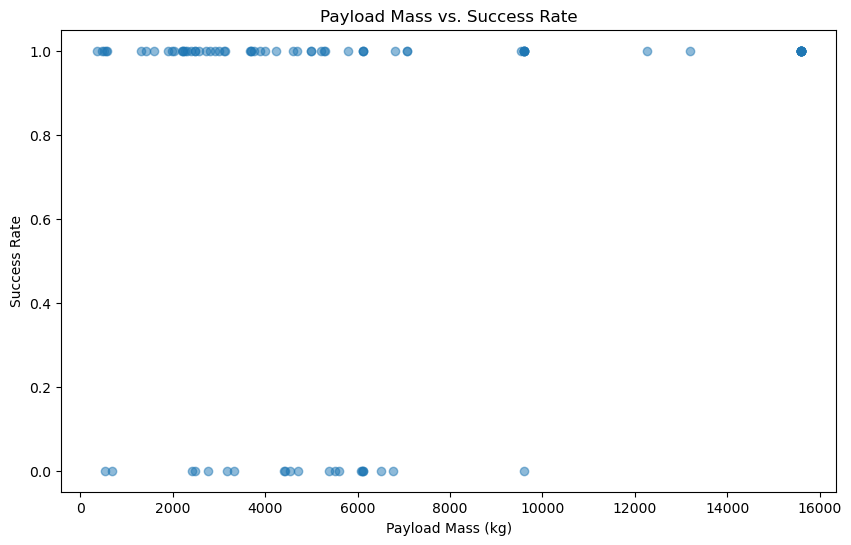

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PayloadMass'], df['Success'], alpha=0.5)
plt.title('Payload Mass vs. Success Rate')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Success Rate')
plt.show()

<Figure size 1000x800 with 0 Axes>

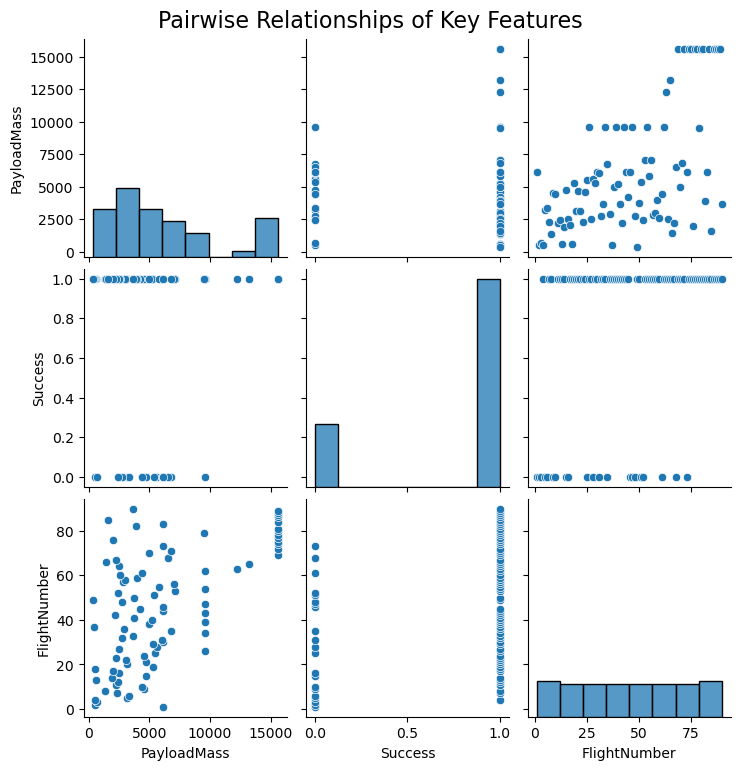

In [23]:
# Plot 1: Pairplot
plt.figure(figsize=(10, 8))
pair_plot = sns.pairplot(df[['PayloadMass', 'Success', 'FlightNumber']])
plt.suptitle('Pairwise Relationships of Key Features', y=1.02, fontsize=16)
plt.show()



In [17]:
print(df.columns)


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Success'],
      dtype='object')


#### Heatmap of Correlations:

Purpose: To show the correlation matrix between multiple features.
Insight: Identify which features are strongly correlated with each other.

Code Snippet:

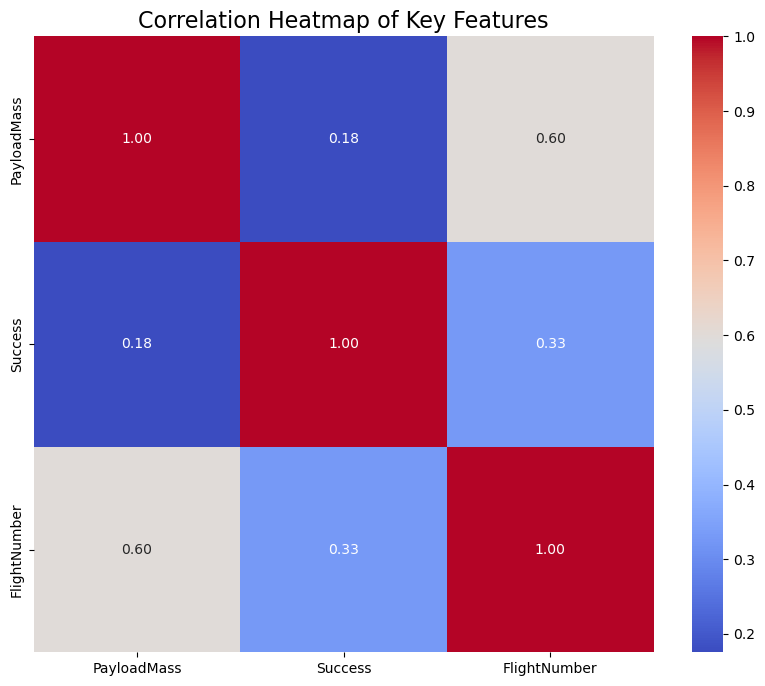

In [25]:
# Drop non-numeric columns
numeric_df = df[['PayloadMass', 'Success', 'FlightNumber']].copy()

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Adjust the title
plt.title('Correlation Heatmap of Key Features', fontsize=16)

# Display the heatmap
plt.show()

In [27]:
import folium
from folium.plugins import MousePosition
from folium.features import DivIcon
import math

# Function to calculate the great-circle distance between two points using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula.
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    # Radius of Earth in kilometers (mean radius)
    r = 6371.0
    
    # Calculate the distance
    distance = c * r
    return distance

# Define the initial center of the map (can be any relevant location)
map_center = [28.562302, -80.577356]

# Create a base map
launch_map = folium.Map(location=map_center, zoom_start=10)

# Add MousePosition to the map to display coordinates on mouse hover
MousePosition(
    position='topright',  # Position of the coordinates display
    separator=' | ',  # Separator between latitude and longitude
    empty_string='No coordinates',  # Display when no coordinates are available
    lng_first=False,  # Show longitude first (default is lat first)
    num_digits=6,  # Number of decimal places
    prefix='Coordinates:',  # Prefix string
).add_to(launch_map)

# After identifying the closest coastline point using the map
# Coordinates for the launch site and closest coastline point
launch_site_lat = 28.562302
launch_site_lon = -80.577356
coastline_lat = 28.56367
coastline_lon = -80.57163

# Calculate the distance
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
print(f"Distance from launch site to coastline: {distance_coastline:.2f} km")

# Create and add a folium.Marker on your selected closest coastline point on the map
distance_marker = folium.Marker(
    [coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(200,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12px; color:#d35400;"><b>{:10.2f} KM</b></div>'.format(distance_coastline),
    )
).add_to(launch_map)

# Display the map
launch_map


Distance from launch site to coastline: 0.58 km


In [33]:
import folium
from folium.plugins import MousePosition
from folium.features import DivIcon
import math

# Function to calculate the great-circle distance between two points using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula.
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    # Radius of Earth in kilometers (mean radius)
    r = 6371.0
    
    # Calculate the distance
    distance = c * r
    return distance

# Define the initial center of the map (can be any relevant location)
map_center = [28.562302, -80.577356]

# Create a base map
launch_map = folium.Map(location=map_center, zoom_start=10)

# Add MousePosition to the map to display coordinates on mouse hover
MousePosition(
    position='topright',  # Position of the coordinates display
    separator=' | ',  # Separator between latitude and longitude
    empty_string='No coordinates',  # Display when no coordinates are available
    lng_first=False,  # Show longitude first (default is lat first)
    num_digits=6,  # Number of decimal places
    prefix='Coordinates:',  # Prefix string
).add_to(launch_map)

# Coordinates for the launch site
launch_site_lat = 28.562302
launch_site_lon = -80.577356

# Example closest points (you can identify these using the map)
# Coordinates for closest city, railway, and highway
city_lat = 28.3922
city_lon = -80.6077

railway_lat = 28.5721
railway_lon = -80.5856

highway_lat = 28.5725
highway_lon = -80.6551

# Calculate distances
distance_city = calculate_distance(launch_site_lat, launch_site_lon, city_lat, city_lon)
distance_railway = calculate_distance(launch_site_lat, launch_site_lon, railway_lat, railway_lon)
distance_highway = calculate_distance(launch_site_lat, launch_site_lon, highway_lat, highway_lon)

# Create circle markers for each point of interest
folium.CircleMarker(
    location=[launch_site_lat, launch_site_lon],
    radius=10,
    color='red',
    fill=True,
    fill_color='white',
    fill_opacity=0.6,
    popup='Launch Site'
).add_to(launch_map)

folium.CircleMarker(
    location=[city_lat, city_lon],
    radius=10,
    color='blue',
    fill=True,
    fill_color='white',
    fill_opacity=0.6,
    popup=f'City ({distance_city:.2f} KM)'
).add_to(launch_map)

folium.CircleMarker(
    location=[railway_lat, railway_lon],
    radius=10,
    color='green',
    fill=True,
    fill_color='white',
    fill_opacity=0.6,
    popup=f'Railway ({distance_railway:.2f} KM)'
).add_to(launch_map)

folium.CircleMarker(
    location=[highway_lat, highway_lon],
    radius=10,
    color='purple',
    fill=True,
    fill_color='white',
    fill_opacity=0.6,
    popup=f'Highway ({distance_highway:.2f} KM)'
).add_to(launch_map)

# Display the map
launch_map.save('launch_sites_map.html')
launch_map